# 2000 x 100,000 km elliptical orbit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# setup the Planet object for Uranus
from AMAT.planet import Planet
planet=Planet("URANUS")
planet.h_skip = 1000e3
planet.loadAtmosphereModel('../../atmdata/Uranus/uranus-gram-avg.dat', 0 , 1 ,2, 3, heightInKmFlag=True)
planet.h_low = 120e3
planet.h_trap= 100e3

In [3]:
# Setup the vehicle object and entry state (design from Girija (2023))
from AMAT.vehicle import Vehicle
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,-11.0 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

In [4]:
# Compute the corridor bounds and TCW for target apoapsis altitude = 100,000 km
overShootLimit, exitflag_os  = vehicle.findOverShootLimit2(2400.0,0.1,-25,-4.0,1E-10,100e3)
underShootLimit, exitflag_us  = vehicle.findUnderShootLimit2(2400.0,0.1,-25 ,-4.0,1E-10,100e3)

In [5]:
# print the overshoot and undershoot limits we just computed.
print("Overshoot  limit : "+str('{:.4f}'.format(overShootLimit))+ " deg")
print("Undershoot limit : "+str('{:.4f}'.format(underShootLimit))+ " deg")
print("TCW: "+ str('{:.4f}'.format(overShootLimit-underShootLimit))+ " deg")

Overshoot  limit : -10.9762 deg
Undershoot limit : -12.1979 deg
TCW: 1.2217 deg


In [6]:
# propogate the overshoot and undershoot trajectories
vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,overShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,180.0)

# Extract and save variables to plot
t_min_os         = vehicle.t_minc
h_km_os          = vehicle.h_kmc
acc_net_g_os     = vehicle.acc_net_g
q_stag_con_os    = vehicle.q_stag_con
q_stag_rad_os    = vehicle.q_stag_rad
heatload_os      = vehicle.heatload

vehicle.setInitialState(1000.0,-15.22,36.51,29.3597,85.7789,underShootLimit ,0.0,0.0)
vehicle.propogateEntry (2400.0,0.1,0.0)

# Extract and save variable to plot
t_min_us         = vehicle.t_minc
h_km_us          = vehicle.h_kmc
acc_net_g_us     = vehicle.acc_net_g
q_stag_con_us    = vehicle.q_stag_con
q_stag_rad_us    = vehicle.q_stag_rad
heatload_us      = vehicle.heatload

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 640x480 with 0 Axes>

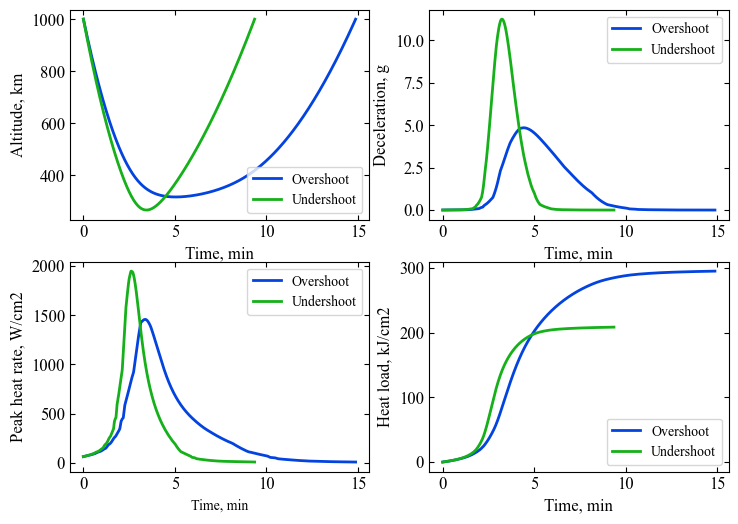

In [7]:
# plot overshoot and undershoot trajectories
fig = plt.figure()
fig = plt.figure()
fig.set_size_inches([8.5, 6])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


plt.subplot(2, 2, 1)
plt.plot(t_min_os , h_km_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , h_km_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=12)
plt.ylabel("Altitude, km",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(loc='lower right', fontsize=10)


plt.subplot(2, 2, 2)
plt.plot(t_min_os , acc_net_g_os , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , acc_net_g_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=12)
plt.ylabel("Deceleration, g",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 3)
plt.plot(t_min_os , q_stag_con_os+q_stag_rad_os, linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , q_stag_con_us+q_stag_rad_us, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=10)
plt.ylabel("Peak heat rate, W/cm2",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(loc='upper right', fontsize=10)

plt.subplot(2, 2, 4)
plt.plot(t_min_os , heatload_os/1e3 , linestyle='solid' , color='xkcd:blue',linewidth=2.0,  label='Overshoot')
plt.plot(t_min_us , heatload_us/1e3, linestyle='solid' , color='xkcd:green',linewidth=2.0,  label='Undershoot')
plt.xlabel('Time, min',fontsize=12)
plt.ylabel("Heat load, kJ/cm2",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)
plt.legend(loc='lower right', fontsize=10)

plt.savefig('../../data/iorio-paper/uranus-ac-limiting-trajectories.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/iorio-paper/uranus-ac-limiting-trajectories.eps', dpi=300,bbox_inches='tight')
plt.savefig('../../data/iorio-paper/uranus-ac-limiting-trajectories.pdf', dpi=300,bbox_inches='tight')

plt.show()

## Guided Trajectory

In [8]:
vehicle=Vehicle('Titania', 3200.0, 146 , 0.24, np.pi*4.5**2.0, 0.0, 1.125, planet)
vehicle.setInitialState(1000.0,-15.22,75.55,29.2877,88.687,-11.5 ,0.0,0.0)
vehicle.setSolverParams(1E-6)

In [9]:
# Set the guidance parameters described in the paper.
# See the function description for parameter details.

# Set max roll rate constraint to 30 deg/s
vehicle.setMaxRollRate(30.0)

# Set Ghdot = 83
# Set Gq = 9.0
# Set v_switch_kms = 16.0 :: this parameter is not really used, and should just be set to low value
# Set low_Alt_km = 120
# Set numPoints_lowAlt = 101
# Set hdot_threshold = -500 m/s
vehicle.setEquilibriumGlideParams(83.0, 9.0, 16.0, 120.0, 101, -500.0)

# Set target orbit parameters
# periapsis = 2000.0 km
# apoapsis = 100,000 km :: set slightly above target (500e3) to account for bias in targeting algorithm
# apoapsis tolerance = 10 km
vehicle.setTargetOrbitParams(2000.0, 100.0E3, 10.0E3)

In [10]:
vehicle.propogateGuidedEntry2(0.5, 0.1, 2400.0)

<Figure size 640x480 with 0 Axes>

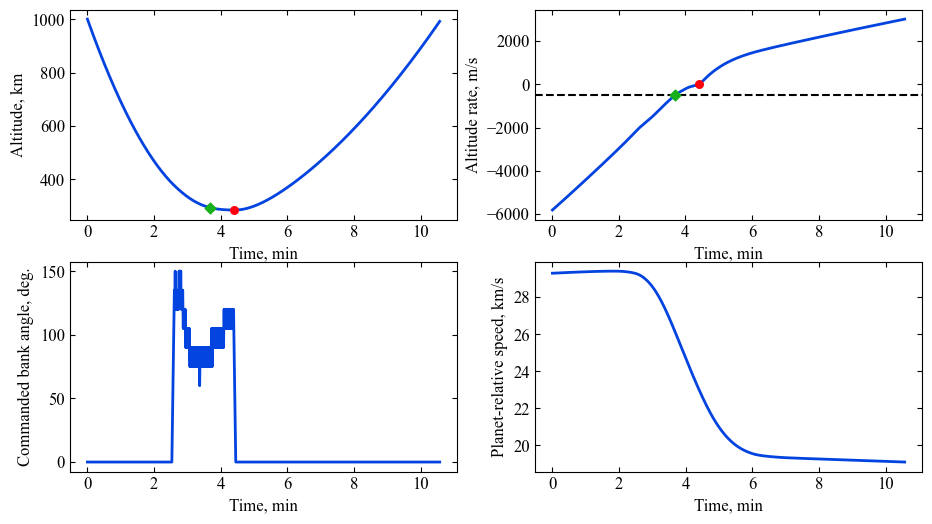

In [11]:
# plot overshoot and undershoot trajectories
fig = plt.figure()
fig = plt.figure()
fig.set_size_inches([11, 6])
plt.rc('font',family='Times New Roman')
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)


plt.subplot(2, 2, 1)
plt.plot(vehicle.t_min_full , vehicle.h_km_full, linestyle='solid' , color='xkcd:blue',linewidth=2.0)
plt.scatter(vehicle.t_switch, vehicle.h_switch, marker="o", s=30, color='xkcd:bright red', zorder=100)
plt.scatter(vehicle.t_step_array[np.where(vehicle.hdot_array[1:]>-500)[0][0]], 
            vehicle.h_step_array[np.where(vehicle.hdot_array[1:]>-500)[0][0]],marker="D", s=30, color='xkcd:green', zorder=100)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel("Altitude, km",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.subplot(2, 2, 2)
plt.plot(vehicle.t_step_array[1:] , vehicle.hdot_array[1:], linestyle='solid' , color='xkcd:blue',linewidth=2.0)
plt.scatter(vehicle.t_switch, vehicle.hdot_array[np.where(vehicle.t_step_array>vehicle.t_switch)[0][0]], marker="o", s=30, color='xkcd:bright red', zorder=100)
plt.scatter(vehicle.t_step_array[np.where(vehicle.hdot_array[1:]>-500)[0][0]], 
            vehicle.hdot_array[np.where(vehicle.hdot_array[1:]>-500)[0][0]],marker="D", s=30, color='xkcd:green', zorder=100)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Altitude rate'+', m/s',fontsize=12)
plt.axhline(y=-500, color='k', linestyle='dashed', linewidth=1.5)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.subplot(2, 2, 3)
plt.plot(vehicle.t_step_array , vehicle.delta_deg_array, linestyle='solid' , color='xkcd:blue',linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel('Commanded bank angle, deg.',fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.subplot(2, 2, 4)
plt.plot(vehicle.t_min_full , vehicle.v_kms_full, linestyle='solid' , color='xkcd:blue',linewidth=2.0)
plt.xlabel('Time, min',fontsize=12)
plt.ylabel("Planet-relative speed, km/s",fontsize=12)
ax = plt.gca()
ax.tick_params(direction='in')
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')
plt.tick_params(direction='in')
plt.tick_params(axis='x',labelsize=12)
plt.tick_params(axis='y',labelsize=12)

plt.savefig('../../data/iorio-paper/uranus-ac-guided-trajectory.png', dpi= 300,bbox_inches='tight')
plt.savefig('../../data/iorio-paper/uranus-ac-guided-trajectory.eps', dpi=300,bbox_inches='tight')
plt.savefig('../../data/iorio-paper/uranus-ac-guided-trajectory.pdf', dpi=300,bbox_inches='tight')
plt.show()

In [12]:
vehicle.terminal_apoapsis

108425.65778324677

In [13]:
vehicle.terminal_periapsis

168.49081030400097

In [14]:
vehicle.periapsis_raise_DV

108.61200151785533